In [4]:
from random import choice, sample

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

pio.templates.default = "seaborn"

In [2]:
def mu(vector):
    mu = sum(vector) / len(vector)
    return mu

In [3]:
def sigma(vector):
    diffs = arr[:, 6] - mu(vector)
    diffs_2 = diffs ** 2
    N = len(diffs)
    summation = sum(diffs_2)
    sigma = np.sqrt(summation / (N - 1))
    return sigma

In [4]:
def norm_z(vector):
    norm_vector = (vector - mu(vector)) / sigma(vector)
    return norm_vector

In [5]:
def f(x):
    return x ** 2 - 2


def fp(x):
    return x * 2


def newton_raphson(x0, tol):
    xt1 = x0
    while abs(f(xt1)) > tol:
        xt2 = xt1 - f(xt1) / fp(xt1)
        xt1 = xt2
    return xt1

In [6]:
newton_raphson(1, 1e-5)

1.4142156862745099

# Questão 01

## Gradiente Descendente

In [33]:
df_1d = pd.read_csv("artificial1d.csv", header=None)

In [34]:
x = df_1d[0].to_numpy()

In [35]:
y = df_1d[1].to_numpy()

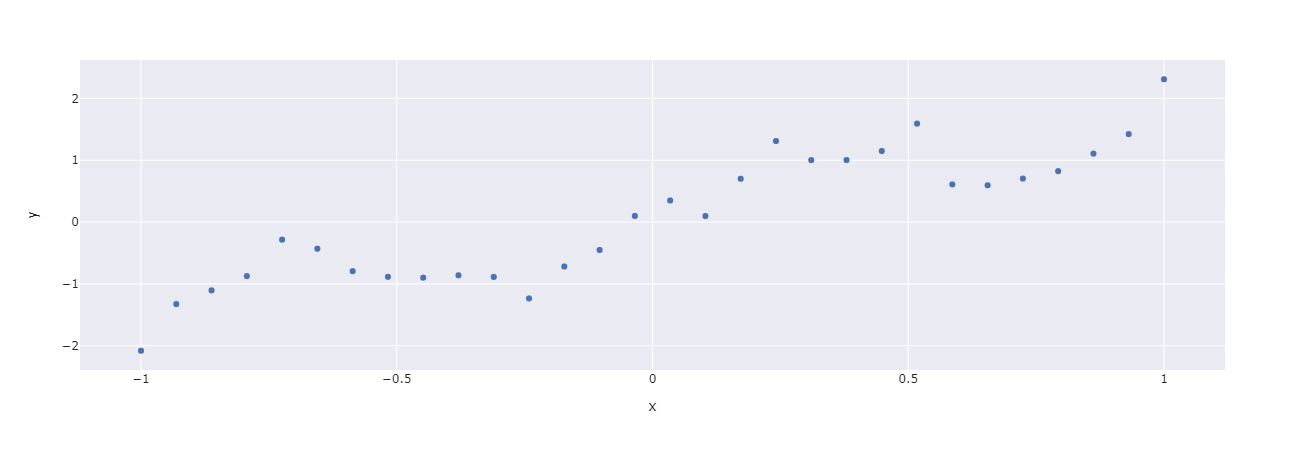

In [36]:
px.scatter(x=x, y=y)

### Montagem do Algoritmo

In [178]:
class AlgoritmoGD:
    def __init__(self):
        self.w0 = 0
        self.w1 = 0
        self.x_i = []
        self.y_i = []
        self.valores_mse = []
        self.valores_w0 = []
        self.valores_w1 = []

        # print("instancia criada")

    def fit(self, x, y):
        if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
            self.x_i = x
            self.y_i = y
        elif isinstance(x, list) and isinstance(y, list):
            self.x_i = np.array(x)
            self.y_i = np.array(y)
        else:
            raise TypeError("Insira listas ou arrays")
        # print('fittado')

    def train(self, alfa=1e-2, num_it=1000):
        w0_t0 = self.w0
        w1_t0 = self.w1
        N = self.y_i.size
        for i in range(num_it):

            ei = self.y_i - self.x_i * w1_t0 - w0_t0
            MSE = (ei ** 2) / (N)
            self.valores_mse.append(sum(MSE))
            # print("ei",sum(ei))

            J_w0 = -(1) * sum(ei) / N
            # print("J_w0",J_w0)

            J_w1 = -(1) * sum(ei * self.x_i) / N
            # print("J_w1",J_w1)

            w0_t1 = w0_t0 - alfa * J_w0
            w1_t1 = w1_t0 - alfa * J_w1

            w0_t0 = w0_t1
            w1_t0 = w1_t1

            self.valores_w0.append(w0_t0)
            self.valores_w1.append(w1_t0)

            # print('---FIM EPOCH----\n\n\n')

        # print(sum(ei),J_w0,J_w1,w0_t1,w1_t1)
        self.w0 = w0_t0
        self.w1 = w1_t0

    def plot_line(self, title="Regressão"):
        fig = go.Figure(
            data=go.Scatter(
                x=self.x_i, y=self.x_i * self.w1 + self.w0, name="Algoritmo GD"
            ),
            layout=go.Layout(title=title),
        )
        fig.add_trace(
            go.Scatter(x=self.x_i, y=self.y_i, name="Dados 1D", mode="markers")
        )

        return fig

    def plot_mse(self, title="MSE x Iterações"):
        fig = go.Figure(
            data=go.Scatter(
                x=list(range(len(self.valores_mse))), y=self.valores_mse, name="MSE"
            ),
            layout=go.Layout(title=title),
        )
        return fig

In [10]:
gd = AlgoritmoGD()

In [11]:
gd.fit(x=x, y=y)
gd.train()
gd.__dict__.get("w0"), gd.__dict__.get("w1")

(0.06761500548818637, 1.5305049470536178)

### Estudo de Alfa

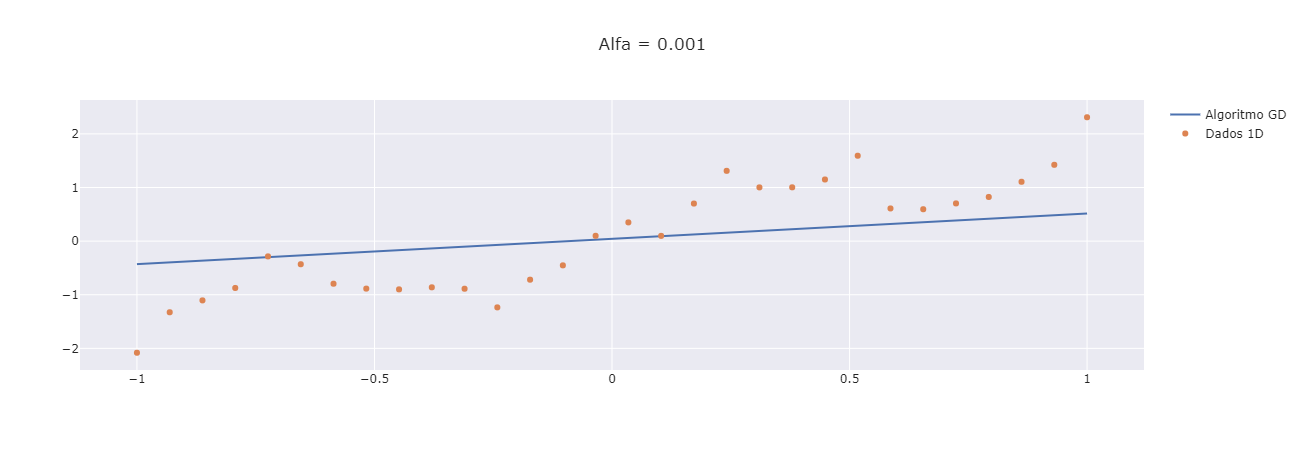

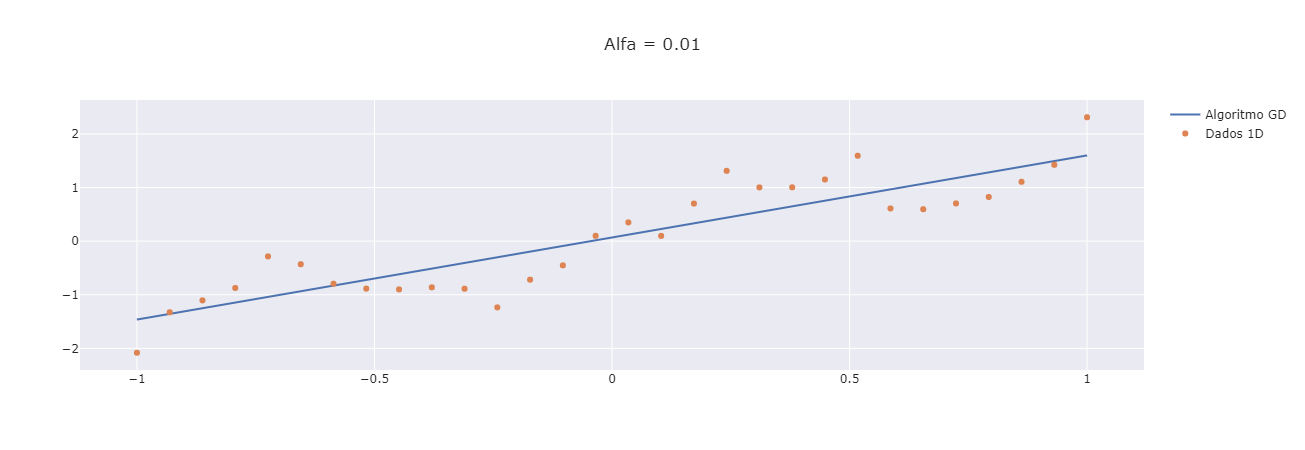

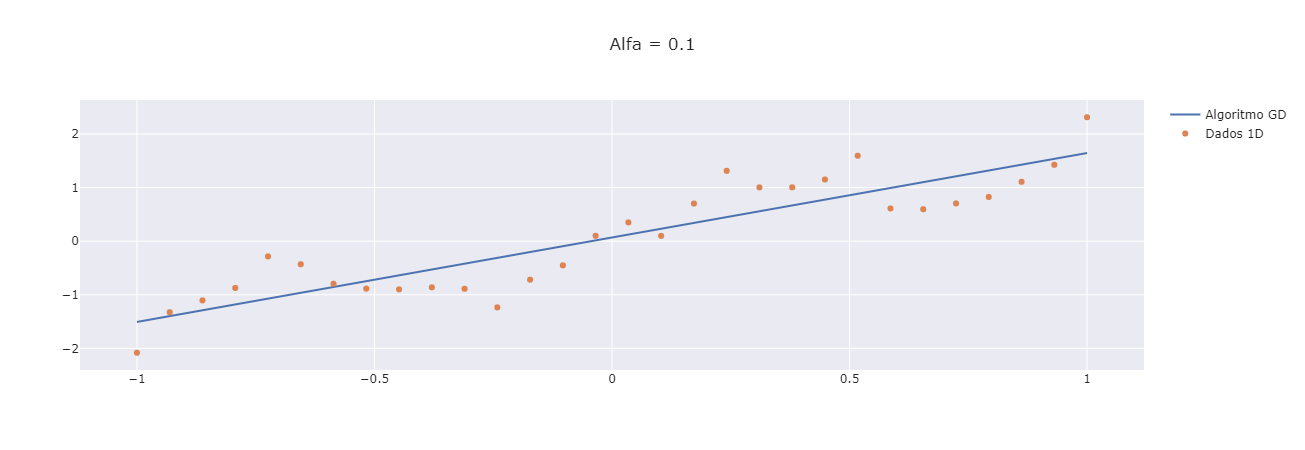

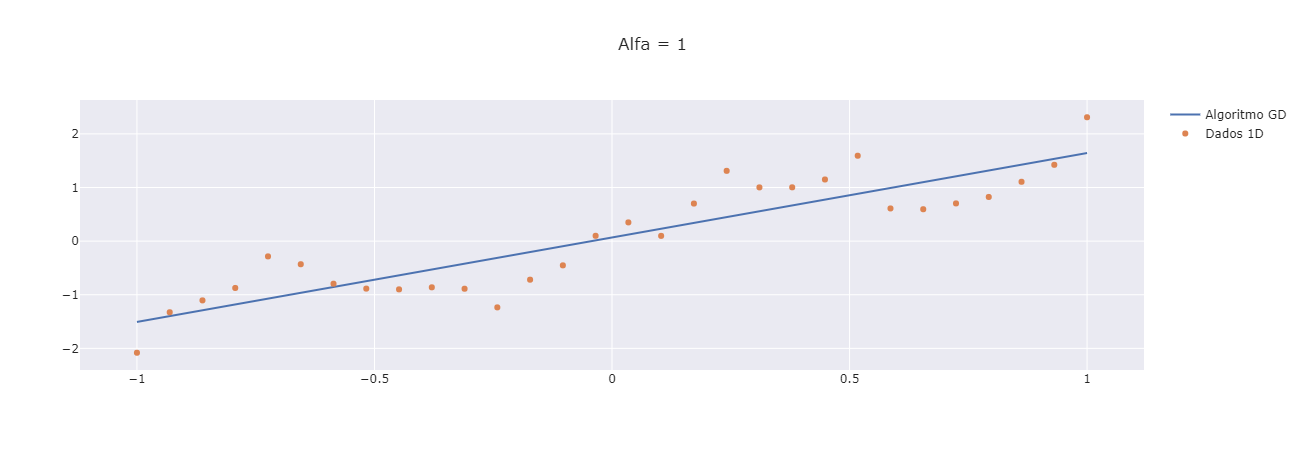

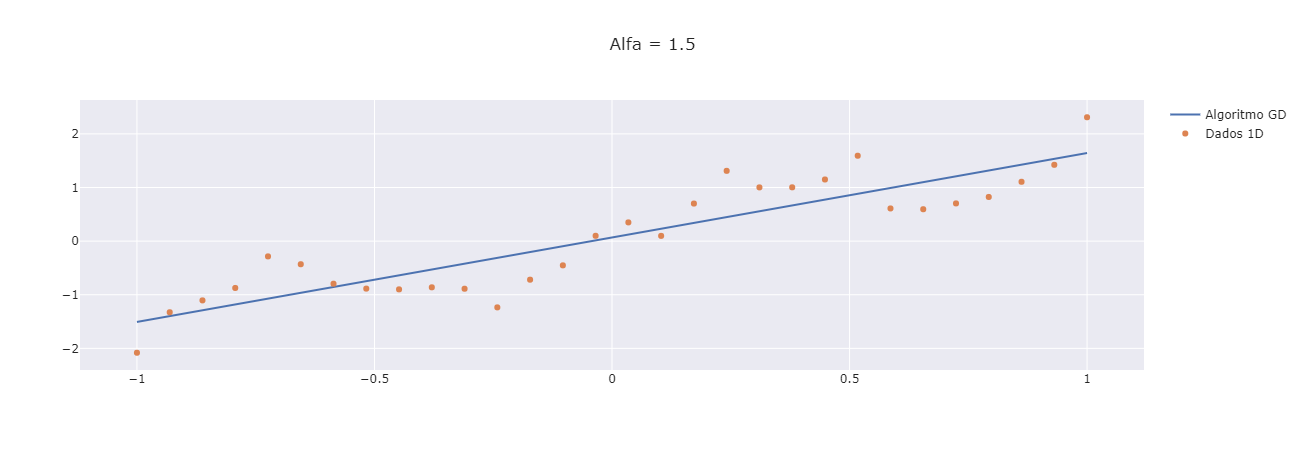

In [12]:
for alfa in [1e-3, 1e-2, 1e-1, 1, 1.5]:
    gd = AlgoritmoGD()
    gd.fit(x=x, y=y)
    gd.train(alfa)
    gd.plot_line(title=f"Alfa = {alfa}").show()

### Estudo Iterações

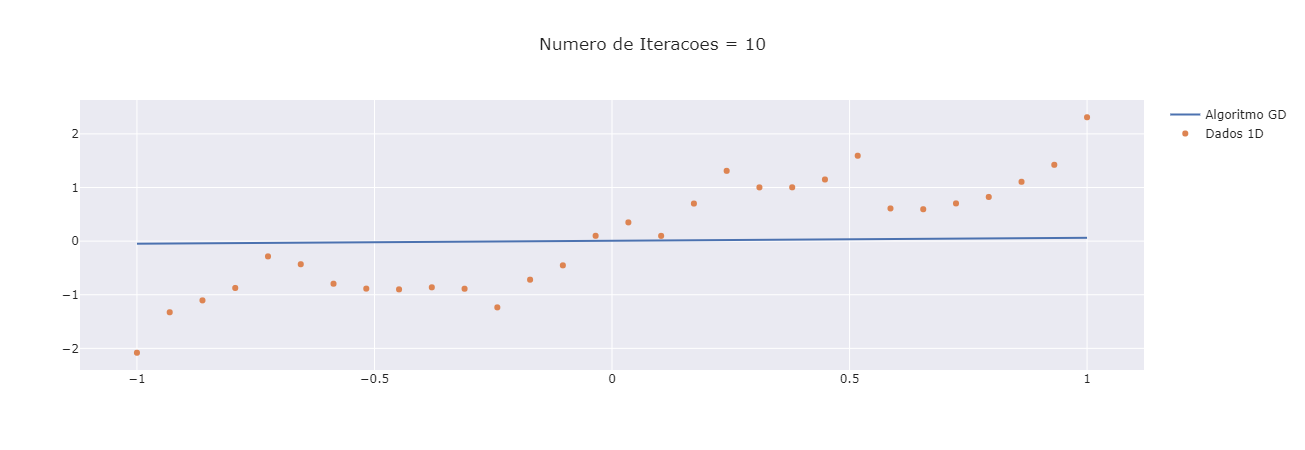

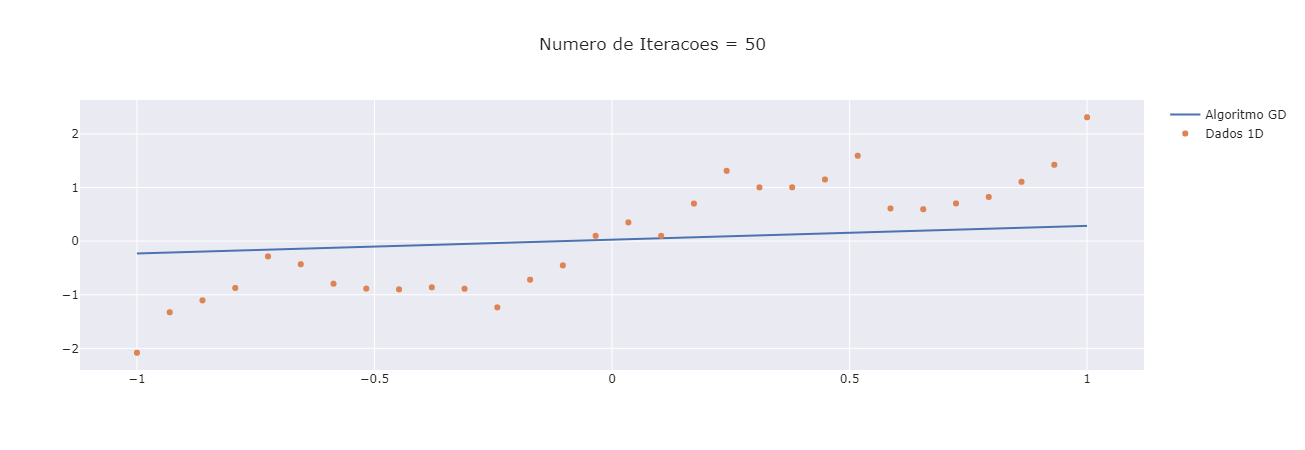

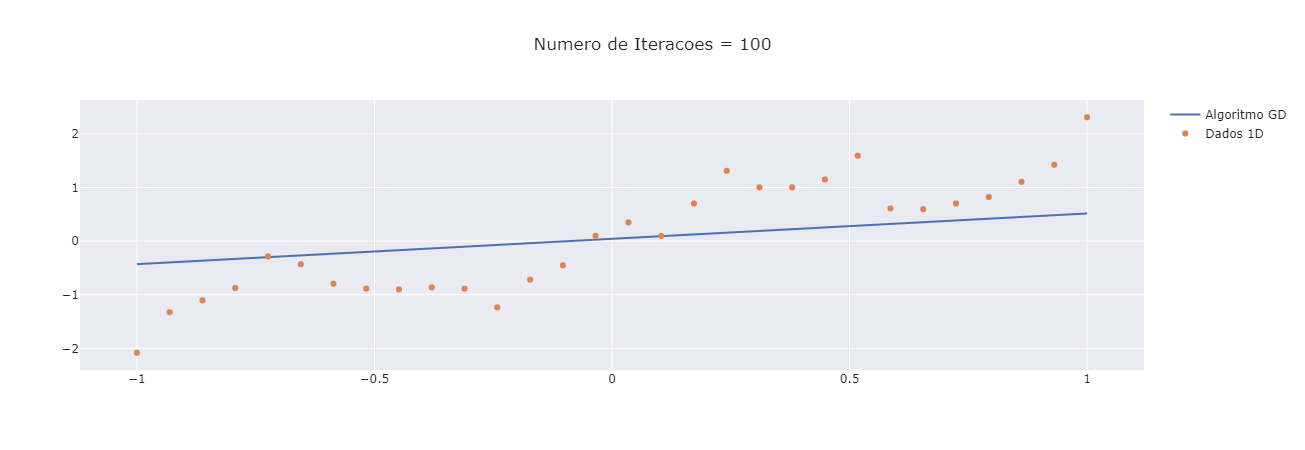

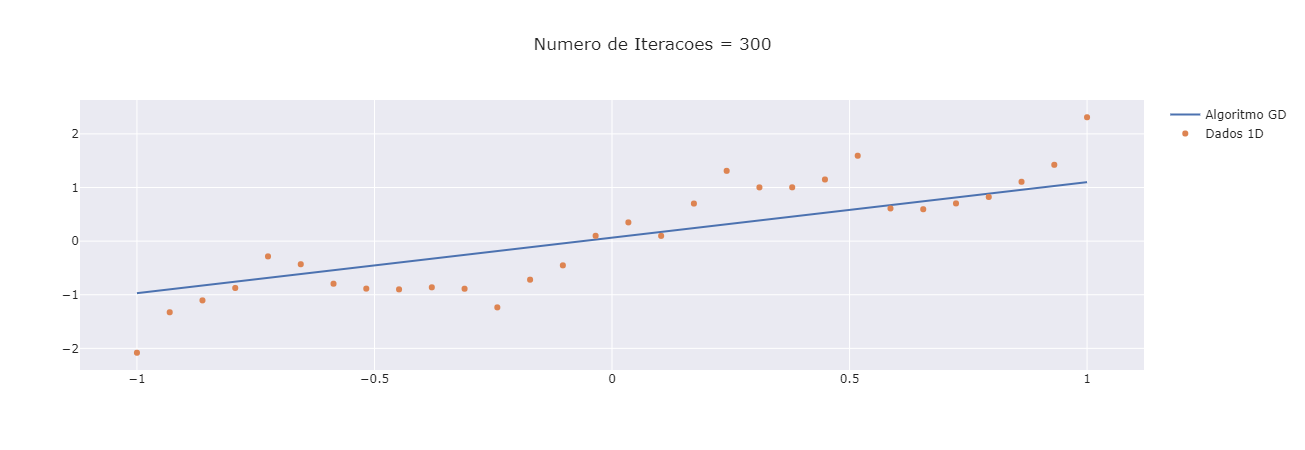

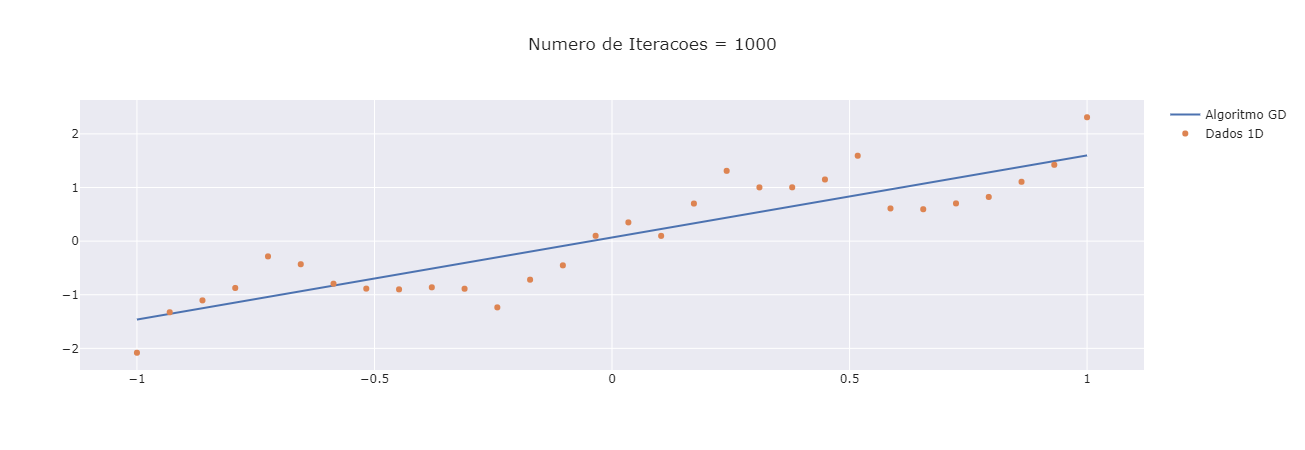

In [13]:
for iteracoes in [10, 50, 100, 300, 1000]:
    gd = AlgoritmoGD()
    gd.fit(x=x, y=y)
    gd.train(num_it=iteracoes)
    gd.plot_line(title=f"Numero de Iteracoes = {iteracoes}").show()

### MSE X ITERAÇÃO

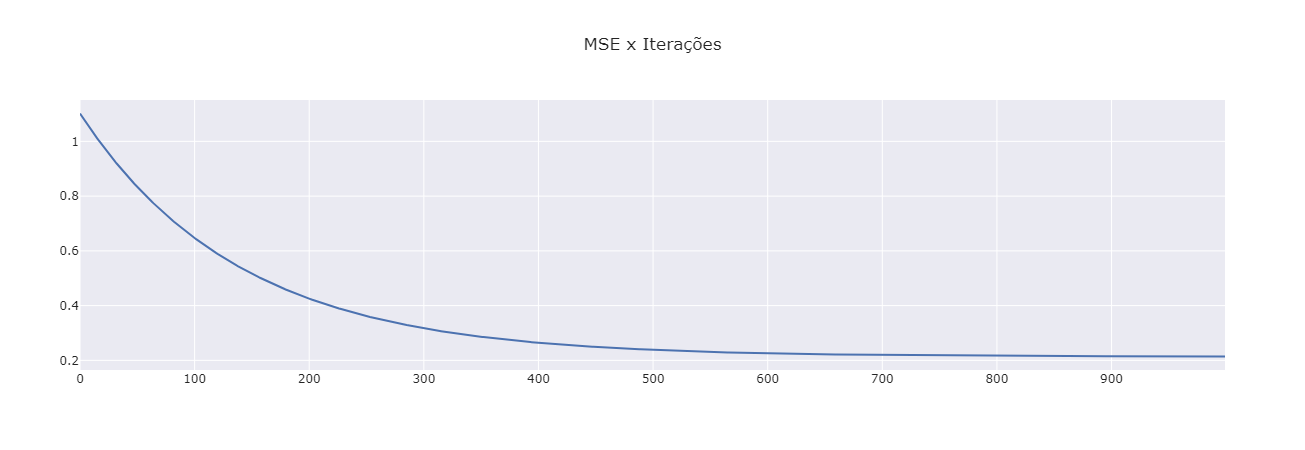

In [14]:
gd = AlgoritmoGD()
gd.fit(x=x, y=y)
gd.train()
gd.plot_mse()

### Plot Dinâmico

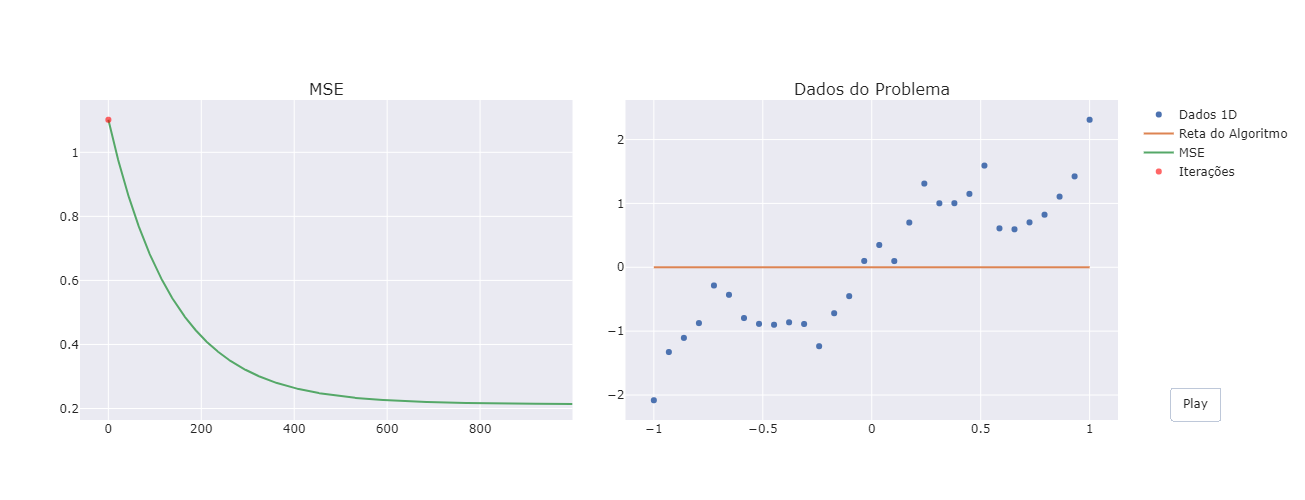

In [15]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=("MSE", "Dados do Problema"),
    horizontal_spacing=0.051,
)

fig.add_trace(go.Scatter(x=x, y=y, mode="markers", name="Dados 1D"), row=1, col=2)
fig.add_trace(go.Scatter(x=x, y=[0] * len(x), name="Reta do Algoritmo"), row=1, col=2)

fig_data_mse = gd.plot_mse().data[0]
# fig_data_mse.mode = 'markers'
# fig_data_mse.marker = dict(color="black", size=5)

fig.add_trace(fig_data_mse, row=1, col=1)

fig.add_trace(
    go.Scatter(
        x=[0],
        y=[gd.valores_mse[0]],
        name="Iterações",
        mode="markers",
        opacity=0.6,
        marker=dict(color="red"),
    ),
    row=1,
    col=1,
)

frames = [
    go.Frame(
        data=[
            go.Scatter(visible=True),
            go.Scatter(x=x, y=gd.valores_w0[k] + gd.valores_w1[k] * x),
            go.Scatter(visible=True),
            go.Scatter(
                x=[k],
                y=[gd.valores_mse[k]],
                mode="markers",
                marker=dict(color="red", size=10),
            ),
        ],
        traces=[0, 1, 2, 3],
    )
    for k in range(0, len(gd.valores_mse), 10)
]

fig.frames = frames
button = dict(
    label="Play",
    method="animate",
    args=[
        None,
        dict(frame=dict(duration=100, redraw=False), fromcurrent=True, mode="animate"),
    ],
)
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            showactive=False,
            y=0,
            x=1.05,
            xanchor="left",
            yanchor="bottom",
            buttons=[button],
        )
    ],
    width=1000,
    height=500,
)

fig

## OLS

In [16]:
class AlgoritmoOLS:
    def __init__(self):
        self.w0 = 0
        self.w1 = 0
        self.alfa = 0.1
        self.x_i = []
        self.y_i = []
        self.valores_mse = []
        self.valores_w0 = []
        self.valores_w1 = []

        # print("instancia criada")

    def fit(self, x, y):
        if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
            self.X = x
            self.y_i = y
        elif isinstance(x, list) and isinstance(y, list):
            self.x_i = np.array(x)
            self.y_i = np.array(y)
        else:
            raise TypeError("Insira listas ou arrays")
        # print('fittado')

    def train(self):
        W = np.inv(X.T * X) * X.T * y
        return W

In [17]:
X = np.append([np.ones(30)], [x], axis=0).T

In [18]:
W = np.linalg.inv(X.T @ X) @ X.T @ y

In [19]:
ei = y - W[0] - W[1] * x

In [20]:
W

array([0.06761792, 1.57486517])

In [21]:
MSE = sum(ei ** 2) / len(x)
MSE

0.21340090132936987

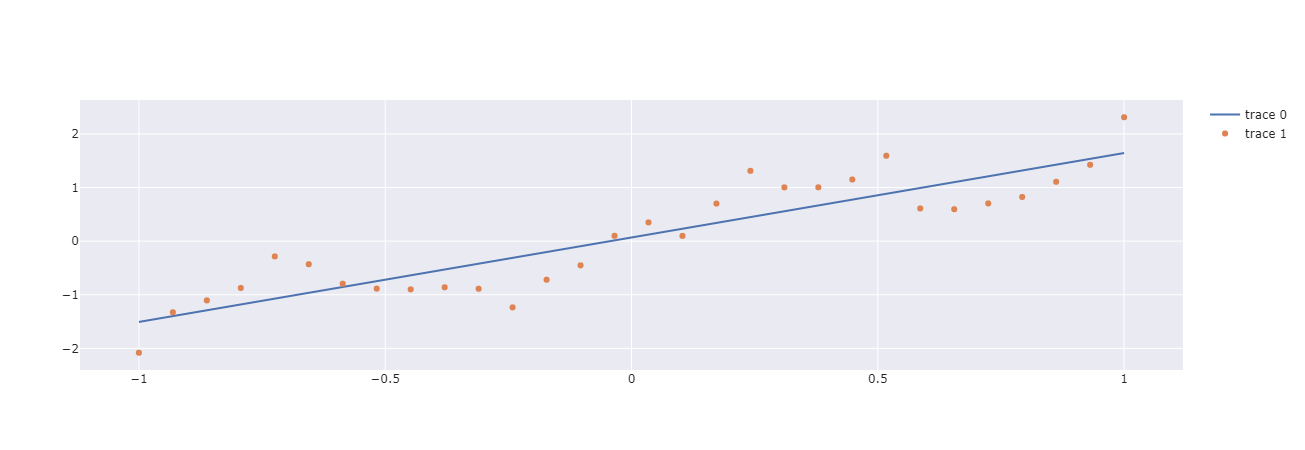

In [22]:
fig = go.Figure(go.Scatter(x=x, y=W[0] + W[1] * x))
fig.add_trace(go.Scatter(x=x, y=y, mode="markers"))

## Gradiente Descendente Estocástico

In [23]:
class AlgoritmoSGD:
    def __init__(self):
        self.w0 = 1
        self.w1 = 1
        self.alfa = 0.1
        self.x_i = []
        self.y_i = []
        self.valores_mse = []
        self.valores_w0 = []
        self.valores_w1 = []
        self.ei_iteracao = []

        # print("instancia criada")

    def fit(self, x, y):
        if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
            self.x_i = x
            self.y_i = y
        elif isinstance(x, list) and isinstance(y, list):
            self.x_i = np.array(x)
            self.y_i = np.array(y)
        else:
            raise TypeError("Insira listas ou arrays")
        # print('fittado')

    def train(self, alfa=1e-2, num_it=30):

        w0_t0 = self.w0
        w1_t0 = self.w1
        tup = list(zip(x, y))
        N = self.y_i.size
        for i in range(num_it):
            ei_iteracao = []
            np.random.shuffle(tup)
            for xi, yi in tup:
                ei = yi - xi * w1_t0 - w0_t0

                w0_t1 = w0_t0 + alfa * ei
                w1_t1 = w1_t0 + alfa * ei * xi

                w0_t0 = w0_t1
                w1_t0 = w1_t1

                ei_iteracao.append(ei ** 2)

                self.valores_mse.append(sum(ei_iteracao) / len(ei_iteracao))

        self.w0 = w0_t0
        self.w1 = w1_t0

    def plot_line(self, title="Regressão"):
        fig = go.Figure(
            data=go.Scatter(
                x=self.x_i, y=self.x_i * self.w1 + self.w0, name="Algoritmo SGD"
            ),
            layout=go.Layout(title=title),
        )
        fig.add_trace(
            go.Scatter(x=self.x_i, y=self.y_i, name="Dados 1D", mode="markers")
        )

        return fig

    def plot_mse(self, title="MSE x Iterações"):
        fig = go.Figure(
            data=go.Scatter(
                x=list(range(len(self.valores_mse))),
                y=self.valores_mse,
                name="MSE",
            ),
            layout=go.Layout(title=title),
        )
        return fig

In [24]:
sgd = AlgoritmoSGD()

In [25]:
sgd.fit(x, y)

In [26]:
sgd.train()

In [27]:
sgd.__dict__["w0"]

0.07258755131713956

In [28]:
sgd.__dict__["w1"]

1.5521430266489336

In [29]:
sgd.__dict__.get("valores_mse")[-1]

0.21644910823326097

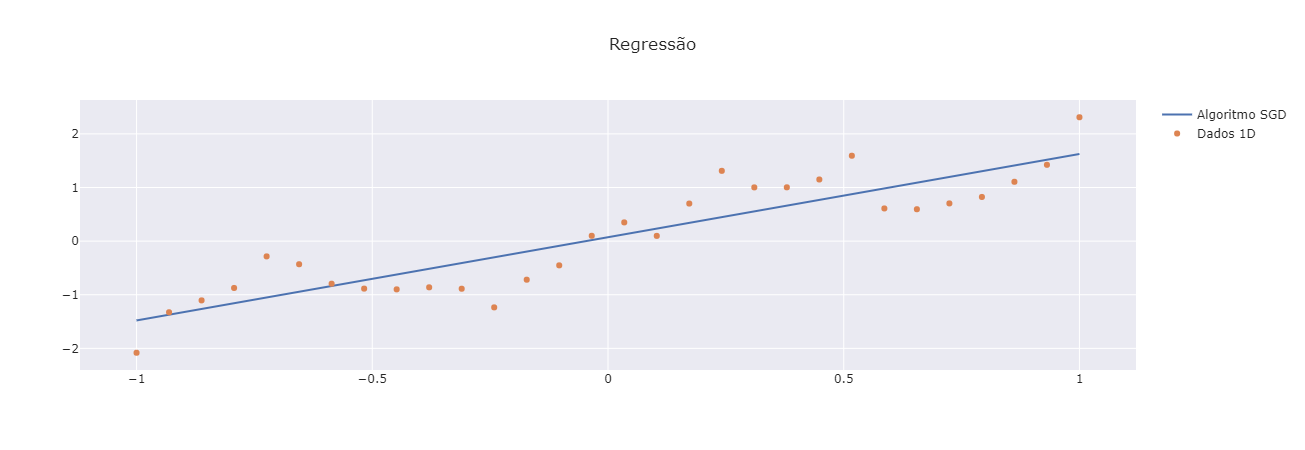

In [30]:
sgd.plot_line()

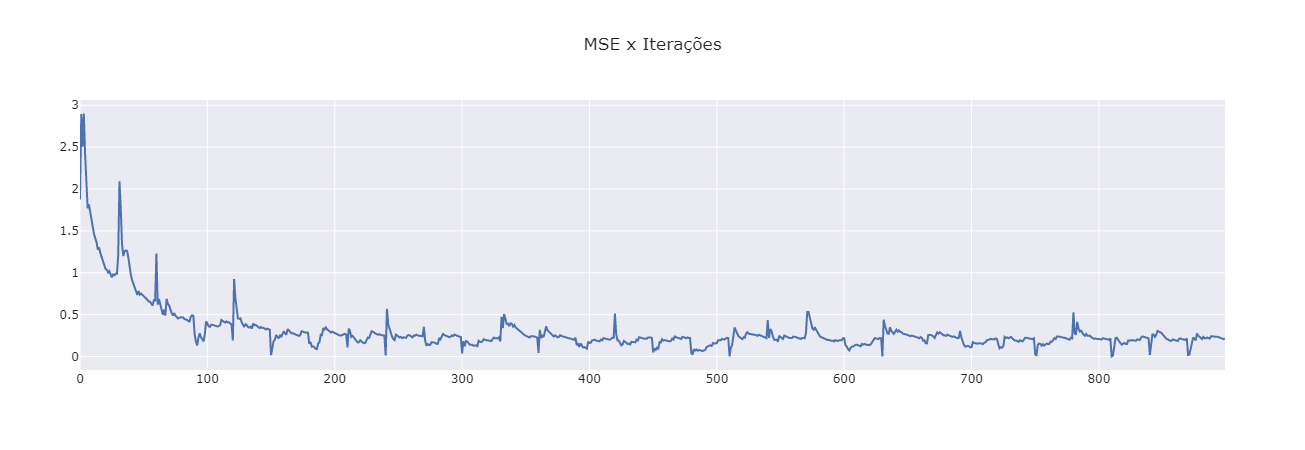

In [31]:
sgd.plot_mse()

# Questão 02

## Separando o Dataset

In [139]:
boston = pd.read_csv("boston.csv", header=None)

In [140]:
boston_y = boston.iloc[:, -1]
boston_X = boston.iloc[:, :-1]

In [141]:
train_size = round(0.8 * boston_y.size)

In [142]:
train_indexes = sample(range(boston_y.size), train_size)

In [143]:
train_sample = boston[boston.index.isin(train_indexes)]

In [144]:
test_sample = boston[~boston.index.isin(train_indexes)]

In [145]:
X_test, y_test = test_sample.iloc[:, :-1].to_numpy(), test_sample.iloc[:, -1].to_numpy()

In [146]:
X_train, y_train = (
    train_sample.iloc[:, :-1].to_numpy(),
    train_sample.iloc[:, -1].to_numpy(),
)

In [147]:
X_train.shape, X_test.shape

((405, 13), (101, 13))

## Criando os Polinomios


In [85]:
class MMScaler:
    def __init__(self, X):
        self.min = np.min(X, axis=0)
        self.max = np.max(X, axis=0)

    def scale(self, X):
        return (X - self.min) / (self.max - self.min)

    def reverse(self, X_normalized):
        return X_normalized * (self.max - self.min) + self.min

In [86]:
def add_column_one(X):
    return np.append(np.ones(shape=(X.shape[0], 1)), X, axis=1)

In [87]:
def making_poly(values, order):
    row = np.array([])
    for i in range(1, order + 1):
        if i == 0:
            row = np.append(row, 1)
        else:
            row = np.append(row, np.power(values, i))
    return row

In [88]:
def make_poly_matrix(X, order):
    poly_X = np.zeros((X.shape[0], X.shape[1] * order))
    for row in range(X.shape[0]):
        poly_X[row, :] = making_poly(X[row, :], order)
    return poly_X

In [121]:
def add_noise_matrix(X):
    noise = 1e-10 * np.eye(X.shape[1])
    return X + noise

In [122]:
def my_func(X_train, X_test, y_train, y_test, poly_order=1, l2_lambda=0):
    rmse_test = []
    rmse_train = []
    for order in range(1, poly_order + 1):
        # Scaling the data
        scaler_X_train = MMScaler(X_train)
        scaler_y_train = MMScaler(y_train)
        X_train_scaled = scaler_X_train.scale(X_train)
        y_train_scaled = scaler_y_train.scale(y_train)

        # Making the nth-order polynom

        X_train_scaled_poly = make_poly_matrix(X_train_scaled, order)
        X_train_scaled_poly_1 = add_column_one(X_train_scaled_poly)
        X, y = X_train_scaled_poly_1, y_train_scaled
        X_noised = add_noise_matrix(X.T @ X)

        # lambda matrix
        l2_matrix = l2_lambda * np.eye(X_noised.shape[0])
        l2_matrix[0, 0] = 0

        # Get W vector
        W = np.linalg.inv(X_noised + l2_matrix) @ X.T @ y

        # Get results
        y_pred_train = scaler_y_train.reverse(X_train_scaled_poly_1 @ W)

        X_test_scaled = scaler_X_train.scale(X_test)
        X_test_scaled_poly = make_poly_matrix(X_test_scaled, order)
        X_test_scaled_poly_1 = add_column_one(X_test_scaled_poly)

        y_pred_test = scaler_y_train.reverse(X_test_scaled_poly_1 @ W)

        rmse_train.append(np.sqrt(np.mean((y_pred_train - y_train) ** 2)))
        rmse_test.append(np.sqrt(np.mean((y_pred_test - y_test) ** 2)))
    return rmse_test, rmse_train, W

In [150]:
poly_order = 12

## SEM Regularização L2

In [173]:
l2_lambda = 0.0
rmse_test, rmse_train, W = my_func(
    X_train, X_test, y_train, y_test, poly_order, l2_lambda
)

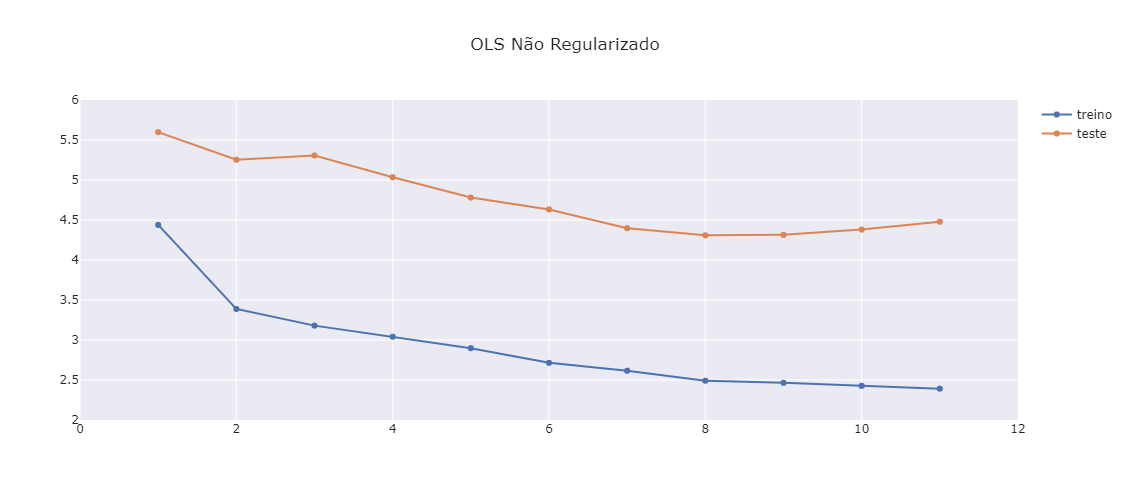

In [174]:
fig = go.Figure(go.Scatter( x=list(range(1, poly_order)), y = rmse_train, name="treino"))
fig.add_trace( go.Scatter(x =list(range(1, poly_order)), y = rmse_test, name="teste"))
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    title = "OLS Não Regularizado"
)
fig.update_xaxes(range=[0, poly_order])
fig.update_yaxes(range=[2, 6])

## COM Regularização L2

In [175]:
l2_lambda = 0.01
rmse_test_l2, rmse_train_l2, W = my_func(
    X_train, X_test, y_train, y_test, poly_order, l2_lambda
)

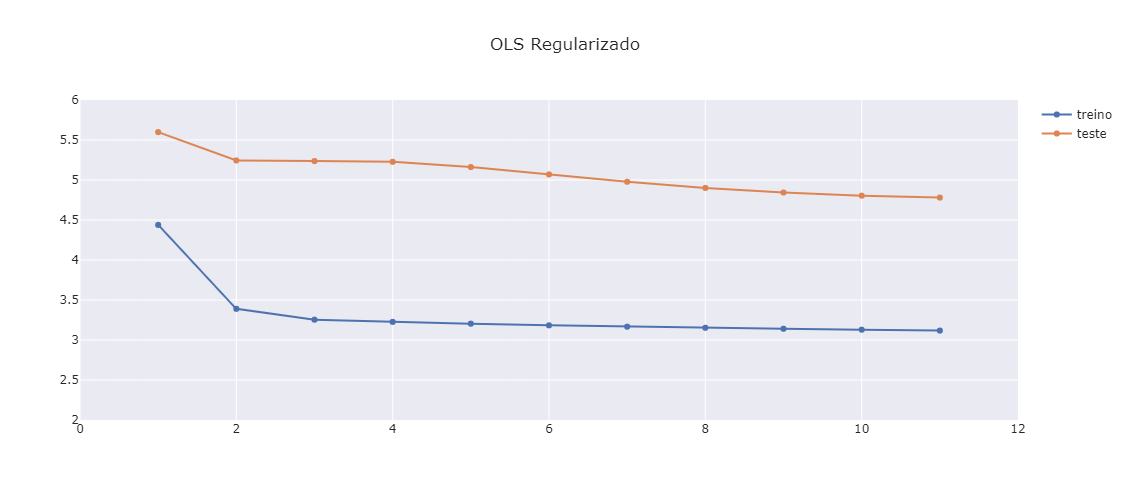

In [177]:
fig = go.Figure(go.Scatter( x=list(range(1, poly_order)), y = rmse_train_l2, name="treino"))
fig.add_trace( go.Scatter(x =list(range(1, poly_order)), y = rmse_test_l2, name="teste"))
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    title = "OLS Regularizado"
)
fig.update_xaxes(range=[0, poly_order])
fig.update_yaxes(range=[2, 6])